<a href="https://colab.research.google.com/github/manjunathsirur1994/DataCleaning-EDA/blob/main/Different_types_of_scalers_and_comparisions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Different types of scalers, transformers, and normalizers to bring the data within a pre-defined range, and comparision of each of them to on data with outliers.

This example uses different scalers, transformers, and normalizers to bring the data within a pre-defined range.

QuantileTransformer provides non-linear transformations in which distances between marginal outliers and inliers are shrunk. PowerTransformer provides non-linear transformations in which data is mapped to a normal distribution to stabilize variance and minimize skewness.

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer, QuantileTransformer, PowerTransformer, MaxAbsScaler, minmax_scale, Normalizer
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = fetch_california_housing()
x,y = dataset.data, dataset.target
x

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [3]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [4]:
dataset.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [5]:
df = pd.DataFrame(data=x, columns=dataset.feature_names)
df['target'] = y
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [6]:
df = df[["MedInc", "AveOccup","target"]]
df

,MedInc,AveOccup,target
0,8.3252,2.555556,4.526
1,8.3014,2.109842,3.585
2,7.2574,2.802260,3.521
3,5.6431,2.547945,3.413
4,3.8462,2.181467,3.422
...,...,...,...
20635,1.5603,2.560606,0.781
20636,2.5568,3.122807,0.771
20637,1.7000,2.325635,0.923
20638,1.8672,2.123209,0.847


In [7]:
x = df.drop('target', axis=1)
y = df['target']
x

,MedInc,AveOccup
0,8.3252,2.555556
1,8.3014,2.109842
2,7.2574,2.802260
3,5.6431,2.547945
4,3.8462,2.181467
...,...,...
20635,1.5603,2.560606
20636,2.5568,3.122807
20637,1.7000,2.325635
20638,1.8672,2.123209


In [8]:
y

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [144]:
unscaled = x
standard_scaler = pd.DataFrame(StandardScaler().fit_transform(x),columns=['MedInc','AveOccup'])
min_max = pd.DataFrame(MinMaxScaler().fit_transform(x), columns=["MedInc", "AveOccup"])
max_abs = pd.DataFrame(MaxAbsScaler().fit_transform(x),columns=['MedInc','AveOccup'])
robust = pd.DataFrame(RobustScaler(quantile_range=(25,75)).fit_transform(x),columns=['MedInc','AveOccup'])
power_trans_YJ = pd.DataFrame(PowerTransformer(method='yeo-johnson').fit_transform(x),columns=['MedInc','AveOccup'])
power_trans_box_cox = pd.DataFrame(PowerTransformer(method='box-cox').fit_transform(x),columns=['MedInc','AveOccup'])
quantile_dis = pd.DataFrame(QuantileTransformer(output_distribution='normal').fit_transform(x), columns=['MedInc','AveOccup'])
norm = pd.DataFrame(Normalizer().fit_transform(x), columns=['MedInc','AveOccup'])

In [145]:
y_scaled = minmax_scale(y)
y_scaled

array([0.90226638, 0.70824656, 0.69505074, ..., 0.15938285, 0.14371281,
       0.15340349])

## Lets see what is the distribution and boxplots of unscaled data look like

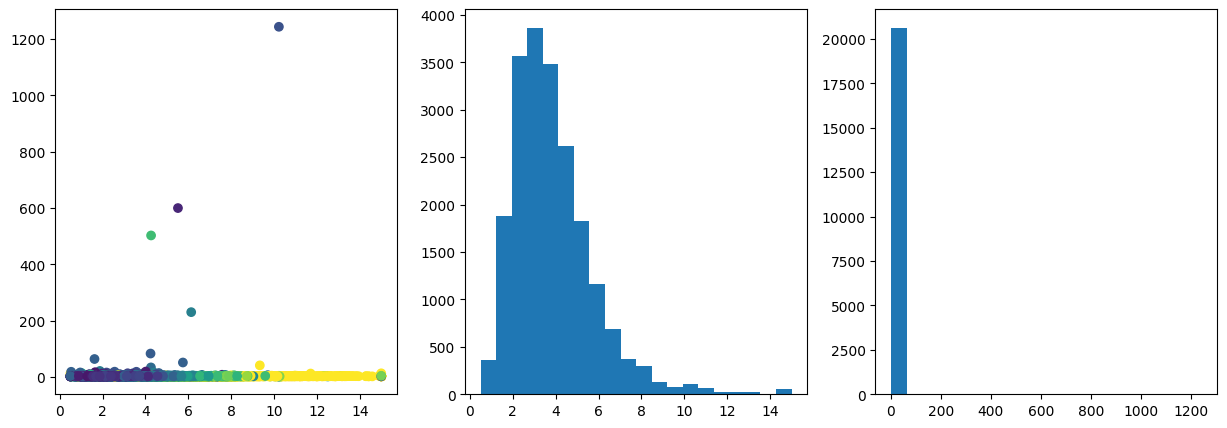

In [146]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(unscaled["MedInc"], unscaled["AveOccup"], c=y_scaled);
plt.subplot(1,3,2)
plt.hist(unscaled['MedInc'], bins=20);
plt.subplot(1,3,3)
plt.hist(unscaled['AveOccup'], bins=20);

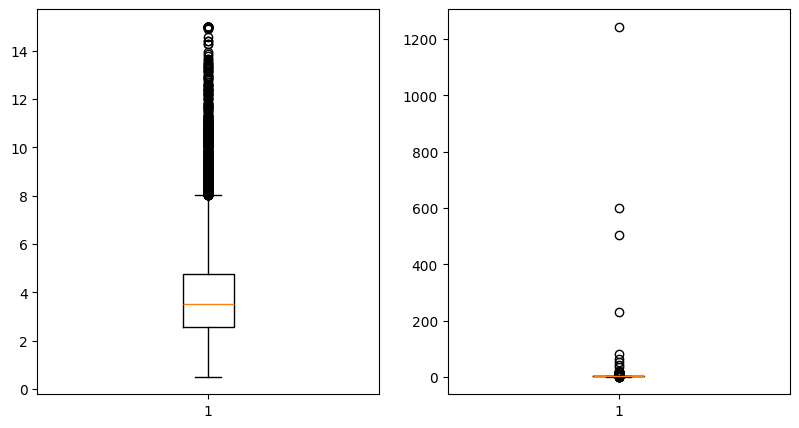

In [147]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.boxplot(unscaled['MedInc']);
plt.subplot(1,3,2)
plt.boxplot(unscaled['AveOccup']);

##StandardScaler():
StandardScaler removes the mean and scales the data to unit variance. However, the outliers have an influence when computing the empirical mean and standard deviation. Note in particular that because the outliers on each feature have different magnitudes, the spread of the transformed data on each feature is very different: most of the data lie in the [-2, 4] range for the transformed median income feature while the same data is squeezed in the smaller [-0.2, 0.2] range for the transformed average house occupancy.

StandardScaler therefore cannot guarantee balanced feature scales in the presence of outliers.

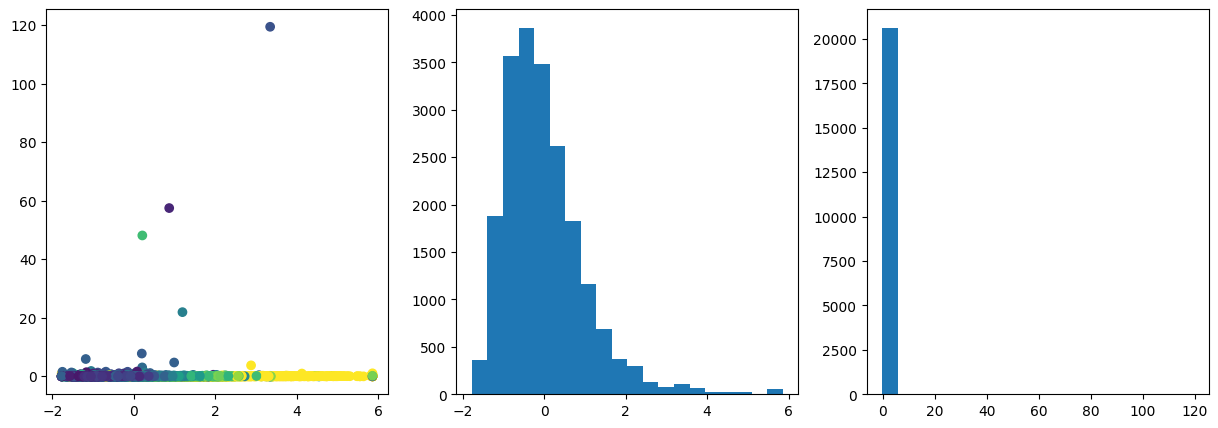

In [148]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(standard_scaler["MedInc"], standard_scaler["AveOccup"], c=y_scaled);
plt.subplot(1,3,2)
plt.hist(standard_scaler['MedInc'], bins=20);
plt.subplot(1,3,3)
plt.hist(standard_scaler['AveOccup'], bins=20);

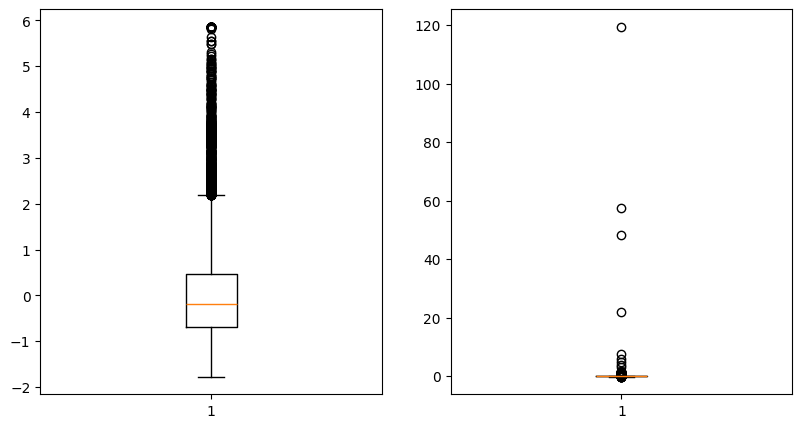

In [149]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.boxplot(standard_scaler['MedInc']);
plt.subplot(1,3,2)
plt.boxplot(standard_scaler['AveOccup']);

##MinMax():

MinMaxScaler rescales the data set such that all feature values are in the range [0, 1]. However, this scaling compresses all inliers into the narrow range [0, 0.005] for the transformed average house occupancy.

Both StandardScaler and MinMaxScaler are very sensitive to the presence of outliers.

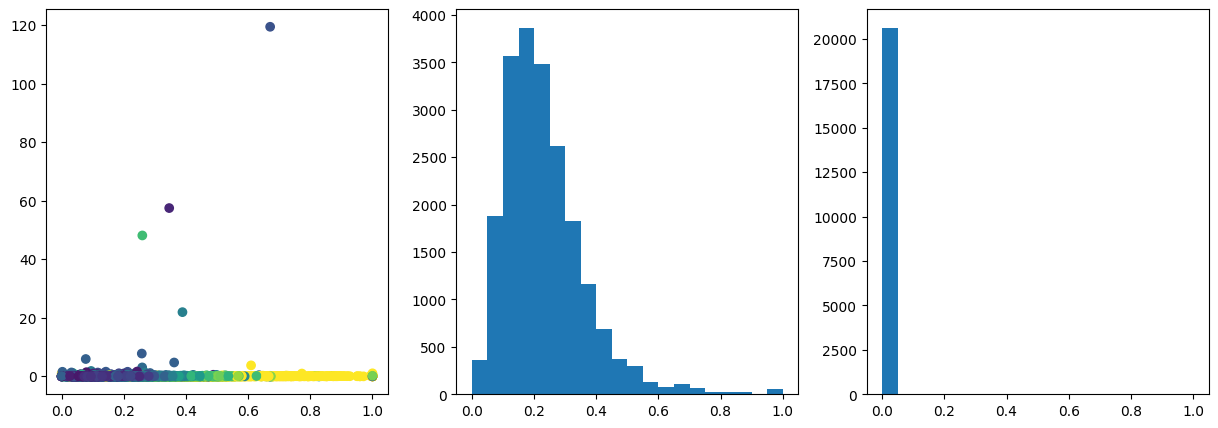

In [150]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(min_max["MedInc"], standard_scaler["AveOccup"], c=y_scaled);
plt.subplot(1,3,2)
plt.hist(min_max['MedInc'], bins=20);
plt.subplot(1,3,3)
plt.hist(min_max['AveOccup'], bins=20);

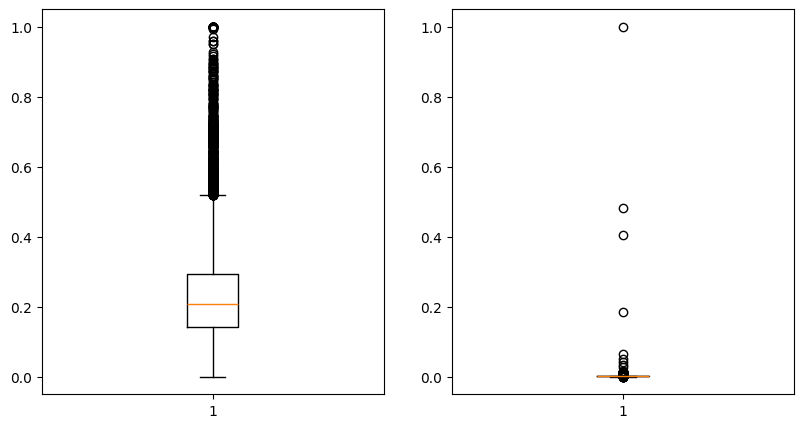

In [151]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.boxplot(min_max['MedInc']);
plt.subplot(1,3,2)
plt.boxplot(min_max['AveOccup']);

## RobustScaler:

MinMaxScaler rescales the data set such that all feature values are in the range [0, 1] as shown in the right panel below. However, this scaling compresses all inliers into the narrow range [0, 0.005] for the transformed average house occupancy.

Both StandardScaler and MinMaxScaler are very sensitive to the presence of outliers.

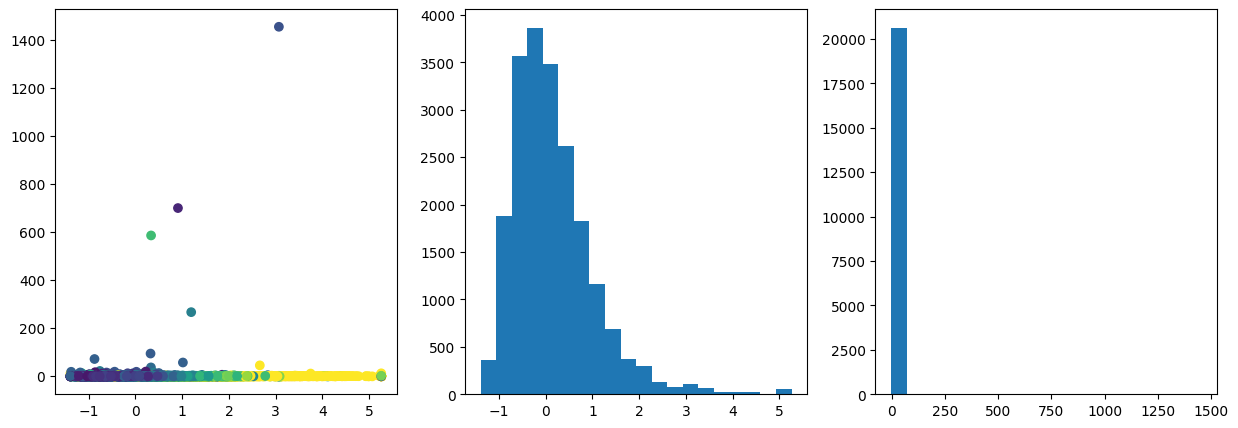

In [152]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(robust["MedInc"], robust["AveOccup"], c=y_scaled);
plt.subplot(1,3,2)
plt.hist(robust['MedInc'], bins=20);
plt.subplot(1,3,3)
plt.hist(robust['AveOccup'], bins=20);

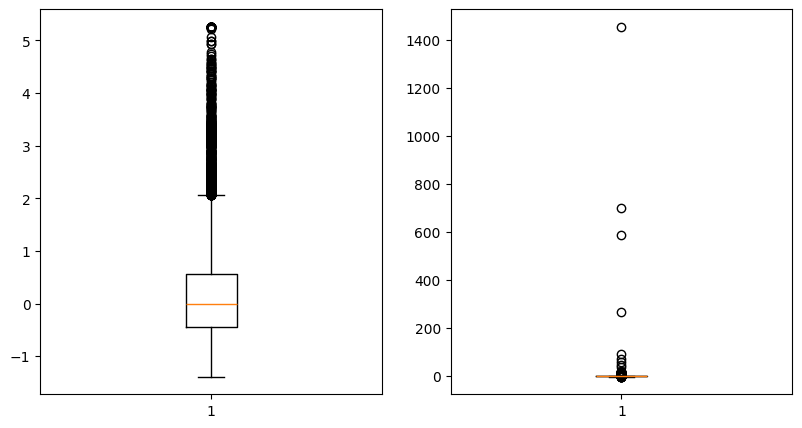

In [153]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.boxplot(robust['MedInc']);
plt.subplot(1,3,2)
plt.boxplot(robust['AveOccup']);

## PowerTransformer: (yeo-johnson)

PowerTransformer applies a power transformation to each feature to make the data more Gaussian-like in order to stabilize variance and minimize skewness. Currently the Yeo-Johnson and Box-Cox transforms are supported and the optimal scaling factor is determined via maximum likelihood estimation in both methods. By default, PowerTransformer applies zero-mean, unit variance normalization. Note that Box-Cox can only be applied to strictly positive data. Income and average house occupancy happen to be strictly positive, but if negative values are present the Yeo-Johnson transformed is preferred.

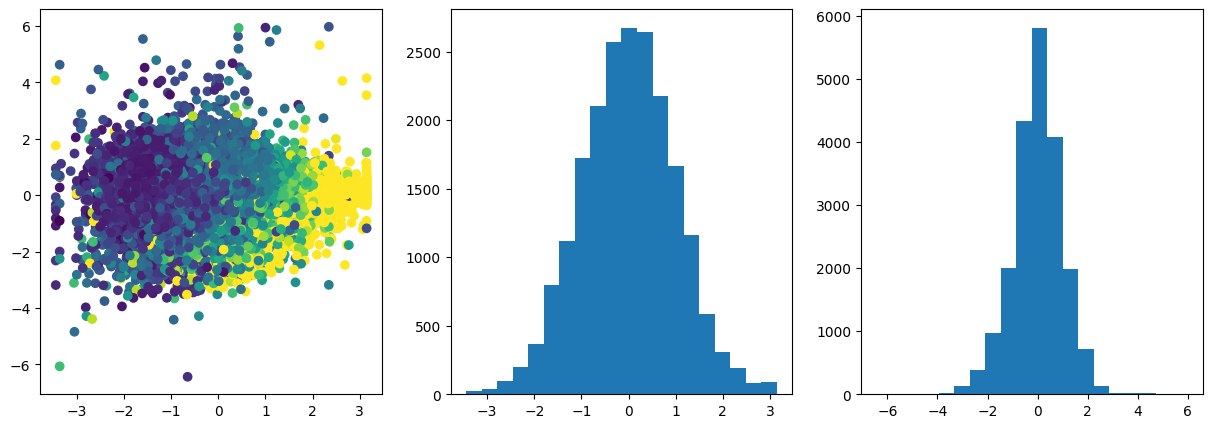

In [154]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(power_trans_YJ["MedInc"], power_trans_YJ["AveOccup"], c=y_scaled);
plt.subplot(1,3,2)
plt.hist(power_trans_YJ['MedInc'], bins=20);
plt.subplot(1,3,3)
plt.hist(power_trans_YJ['AveOccup'], bins=20);

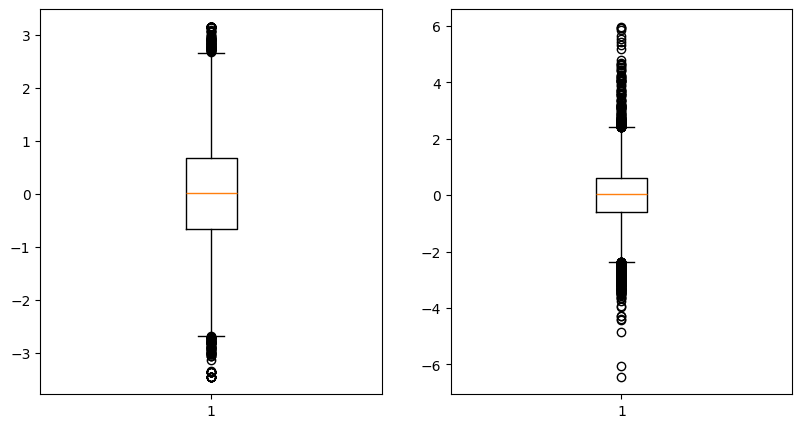

In [155]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.boxplot(power_trans_YJ['MedInc']);
plt.subplot(1,3,2)
plt.boxplot(power_trans_YJ['AveOccup']);

## Power Transformer (box-cox)

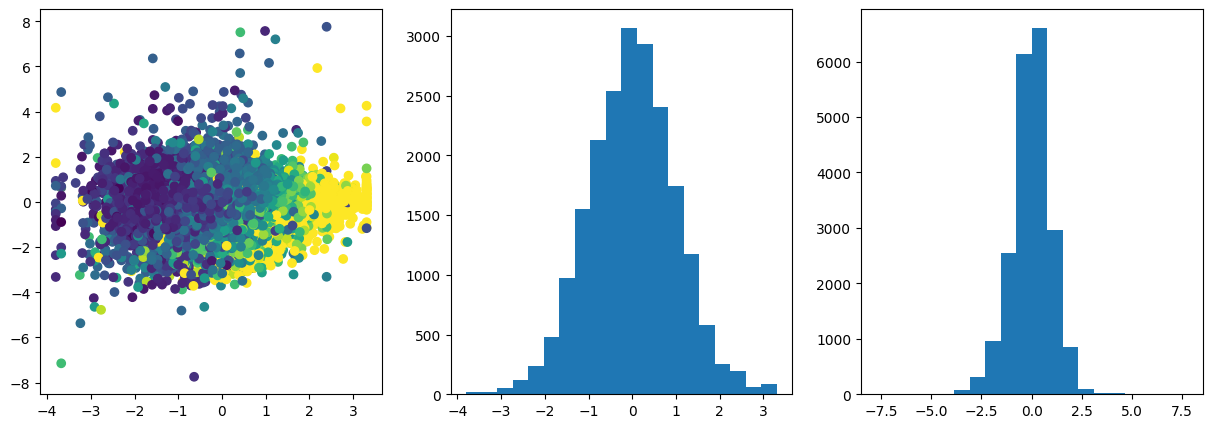

In [156]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(power_trans_box_cox["MedInc"], power_trans_box_cox["AveOccup"], c=y_scaled);
plt.subplot(1,3,2)
plt.hist(power_trans_box_cox['MedInc'], bins=20);
plt.subplot(1,3,3)
plt.hist(power_trans_box_cox['AveOccup'], bins=20);

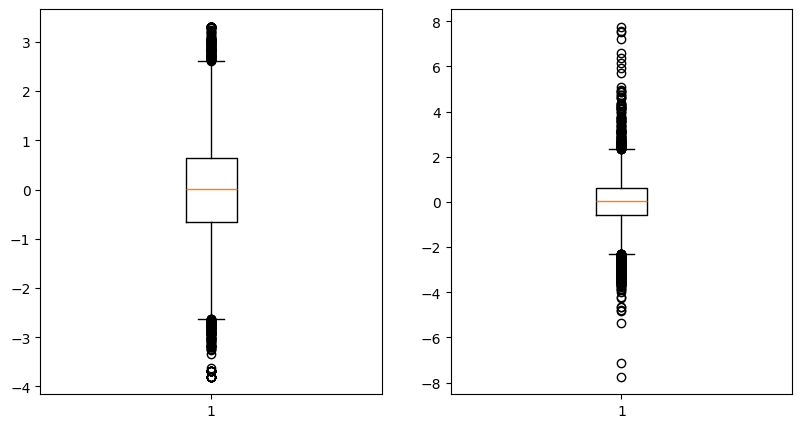

In [157]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.boxplot(power_trans_box_cox['MedInc']);
plt.subplot(1,3,2)
plt.boxplot(power_trans_box_cox['AveOccup']);

## Quantile Transformer:
QuantileTransformer applies a non-linear transformation such that the probability density function of each feature will be mapped to a uniform or Gaussian distribution. In this case, all the data, including outliers, will be mapped to a uniform distribution with the range [0, 1], making outliers indistinguishable from inliers.

RobustScaler and QuantileTransformer are robust to outliers in the sense that adding or removing outliers in the training set will yield approximately the same transformation. But contrary to RobustScaler, QuantileTransformer will also automatically collapse any outlier by setting them to the a priori defined range boundaries (0 and 1). This can result in saturation artifacts for extreme values.

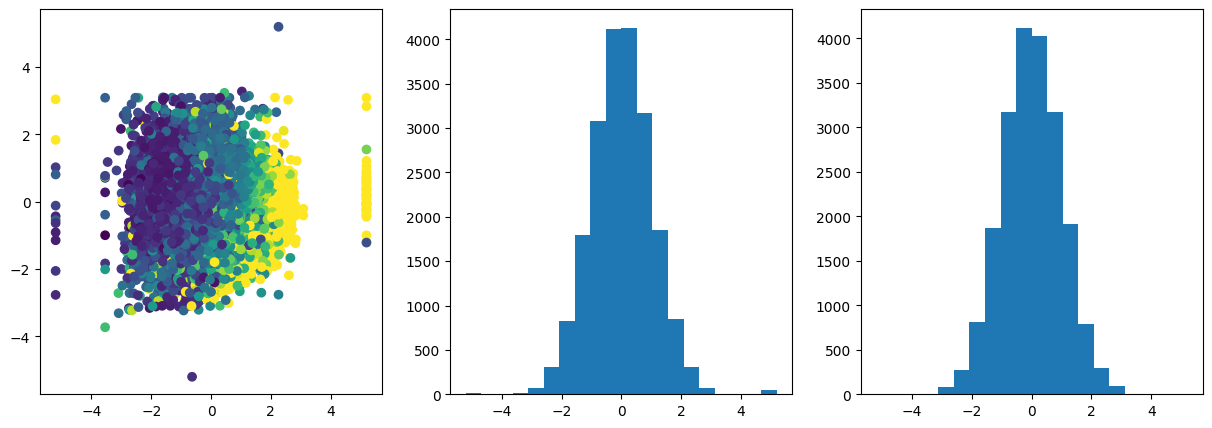

In [158]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(quantile_dis["MedInc"], quantile_dis["AveOccup"], c=y_scaled);
plt.subplot(1,3,2)
plt.hist(quantile_dis['MedInc'], bins=20);
plt.subplot(1,3,3)
plt.hist(quantile_dis['AveOccup'], bins=20);

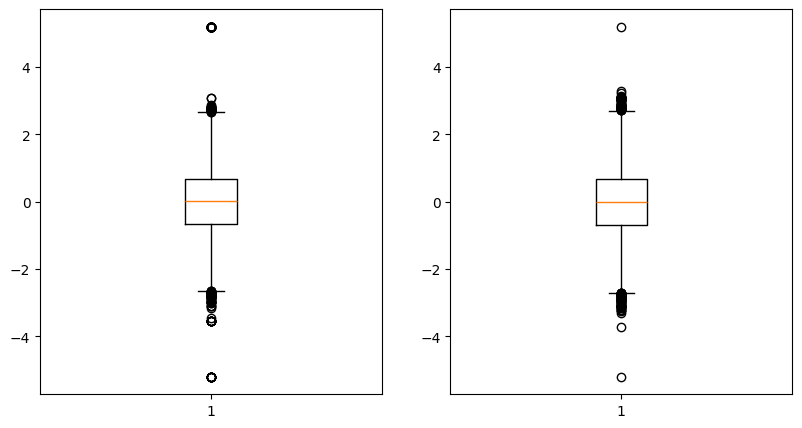

In [159]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.boxplot(quantile_dis['MedInc']);
plt.subplot(1,3,2)
plt.boxplot(quantile_dis['AveOccup']);

##Normalizer:
The Normalizer rescales the vector for each sample to have unit norm, independently of the distribution of the samples. It can be seen on both figures below where all samples are mapped onto the unit circle. In our example the two selected features have only positive values; therefore the transformed data only lie in the positive quadrant. This would not be the case if some original features had a mix of positive and negative values.

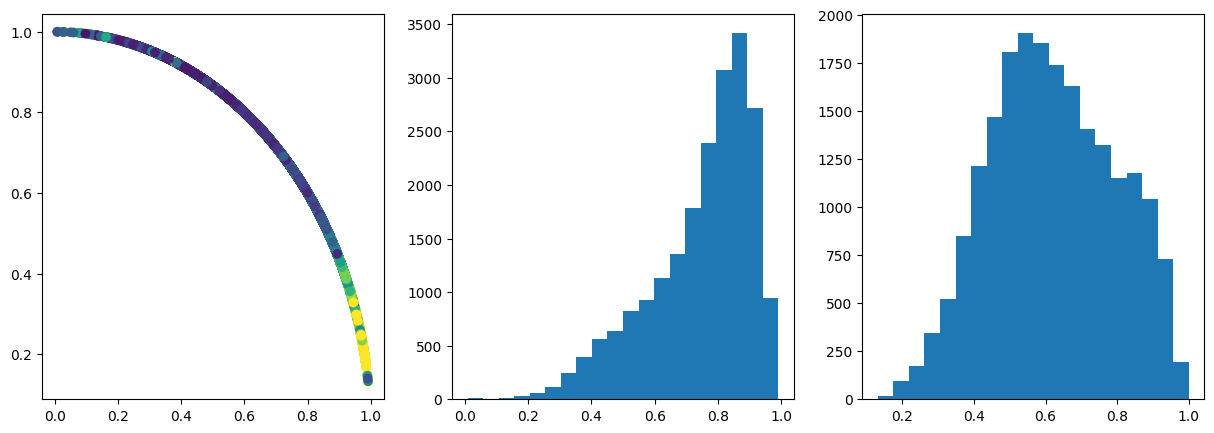

In [160]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(norm["MedInc"], norm["AveOccup"], c=y_scaled);
plt.subplot(1,3,2)
plt.hist(norm['MedInc'], bins=20);
plt.subplot(1,3,3)
plt.hist(norm['AveOccup'], bins=20);

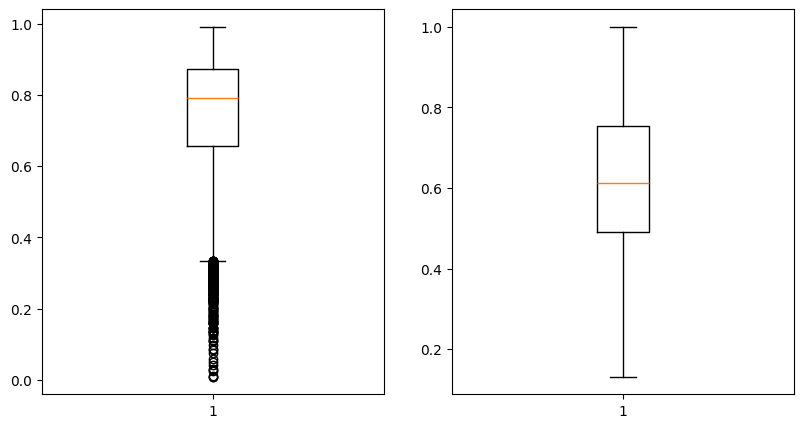

In [161]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.boxplot(norm['MedInc']);
plt.subplot(1,3,2)
plt.boxplot(norm['AveOccup']);